# Intel Image Classification

#### Image Scene Classification of Multiclass

## Context
This is image data of Natural Scenes around the world.

## Content
This Data contains around 25k images of size 150x150 distributed under 6 categories.

{'buildings' -> 0,
'forest' -> 1,
'glacier' -> 2,
'mountain' -> 3,
'sea' -> 4,
'street' -> 5 }

The Train, Test and Prediction data is separated in each zip files. There are around 14k images in Train, 3k in Test and 7k in Prediction.
This data was initially published on https://datahack.analyticsvidhya.com by Intel to host a Image classification Challenge.

## Acknowledgements
Thanks to https://datahack.analyticsvidhya.com for the challenge and Intel for the Data

Photo by Jan Böttinger on Unsplash

## Inspiration
Want to build powerful Neural network that can classify these images with more accuracy.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread

In [2]:
import os

os.listdir('../input/6-categories-images-classifications/seg_train/seg_train')

['mountain', 'street', 'buildings', 'sea', 'forest', 'glacier']

## Image

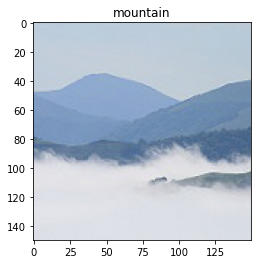

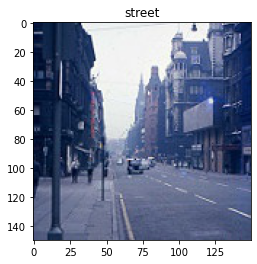

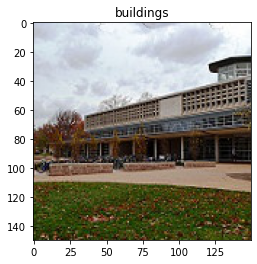

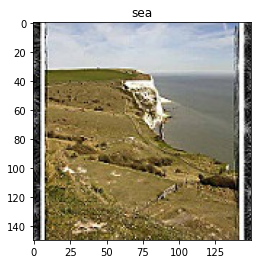

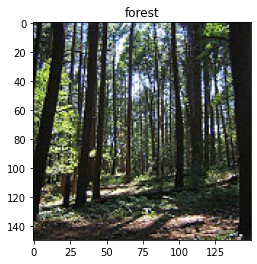

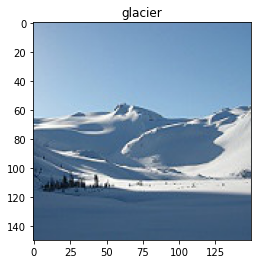

In [3]:
for file in os.listdir('../input/6-categories-images-classifications/seg_train/seg_train'):
    
    img = os.listdir('../input/6-categories-images-classifications/seg_train/seg_train/' + file)[0]
    
    n = imread('../input/6-categories-images-classifications/seg_train/seg_train/' + file + '/' + img)
    plt.title(file)
    plt.imshow(n)
    plt.show()
    

### Getting Image Dimensions

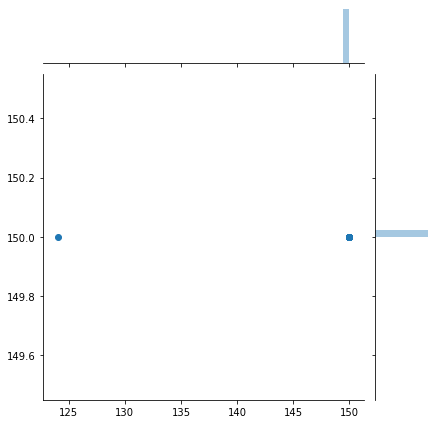

In [4]:
# for buildings 

dim1 = []
dim2 = []

for image_filename in os.listdir('../input/6-categories-images-classifications/seg_train/seg_train/buildings'):
    
    img = imread('../input/6-categories-images-classifications/seg_train/seg_train/buildings/'+ image_filename)
    
    d1,d2,color = img.shape
    
    dim1.append(d1)
    dim2.append(d2)
    
    
sns.jointplot(dim1,dim2)
plt.show()

In [5]:
np.mean(dim1) , np.mean(dim2)

(149.9881332724783, 150.0)

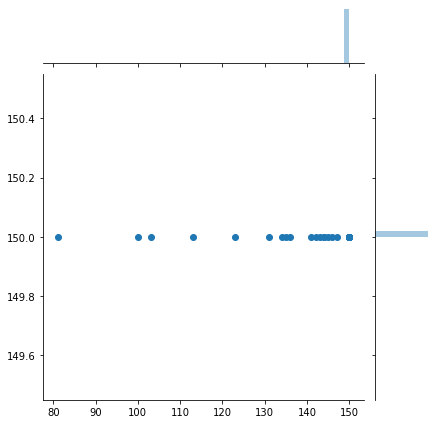

In [6]:
# for mountain 

dim1 = []
dim2 = []

for image_filename in os.listdir('../input/6-categories-images-classifications/seg_train/seg_train/mountain'):
    
    img = imread('../input/6-categories-images-classifications/seg_train/seg_train/mountain/'+ image_filename)
    
    d1,d2,color = img.shape
    
    dim1.append(d1)
    dim2.append(d2)
    
    
sns.jointplot(dim1,dim2)
plt.show()

In [7]:
np.mean(dim1) , np.mean(dim2)

(149.8638535031847, 150.0)

In [8]:
image_shape = (150,150,3)

## Data Augmentation

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [10]:
image_gen = ImageDataGenerator(rotation_range=20,
                              width_shift_range=0.1,
                              height_shift_range=0.1,
                              shear_range=0.1,
                              zoom_range=0.1,
                              horizontal_flip=True,
                              fill_mode='nearest',
                              rescale=1/255)

In [11]:
image_gen.flow_from_directory('../input/6-categories-images-classifications/seg_train/seg_train')

Found 14034 images belonging to 6 classes.


In [12]:
image_gen.flow_from_directory('../input/6-categories-images-classifications/seg_test/seg_test')

Found 3000 images belonging to 6 classes.


##  Training

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping

In [14]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())


model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))


model.add(Dense(50,activation='relu'))
model.add(Dropout(0.5))


model.add(Dense(6,activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

In [15]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [16]:
batch_size = 16

In [17]:
train_image_gen = image_gen.flow_from_d irectory('../input/6-categories-images-classifications/seg_train/seg_train',
                                               target_size=image_shape[:2],
                                                color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='categorical')

Found 14034 images belonging to 6 classes.


In [18]:
val_image_gen = image_gen.flow_from_directory('../input/6-categories-images-classifications/seg_test/seg_test',
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='categorical',shuffle=False)

Found 3000 images belonging to 6 classes.


In [19]:
train_image_gen.class_indices   # True Value

{'buildings': 0,
 'forest': 1,
 'glacier': 2,
 'mountain': 3,
 'sea': 4,
 'street': 5}

In [20]:
results = model.fit_generator(train_image_gen,epochs=20,
                              validation_data=val_image_gen,
                             callbacks=[early_stop])

Epoch 1/20
878/878 [==============================] - 135s 153ms/step - loss: 1.2867 - accuracy: 0.4831 - val_loss: 0.9399 - val_accuracy: 0.6197
Epoch 2/20
878/878 [==============================] - 103s 117ms/step - loss: 1.0536 - accuracy: 0.5963 - val_loss: 0.8574 - val_accuracy: 0.6743
Epoch 3/20
878/878 [==============================] - 104s 119ms/step - loss: 0.9216 - accuracy: 0.6638 - val_loss: 0.8553 - val_accuracy: 0.6657
Epoch 4/20
878/878 [==============================] - 105s 119ms/step - loss: 0.8691 - accuracy: 0.6862 - val_loss: 0.7123 - val_accuracy: 0.7567
Epoch 5/20
878/878 [==============================] - 105s 120ms/step - loss: 0.8073 - accuracy: 0.7163 - val_loss: 0.7026 - val_accuracy: 0.7547
Epoch 6/20
878/878 [==============================] - 105s 119ms/step - loss: 0.7698 - accuracy: 0.7344 - val_loss: 0.7045 - val_accuracy: 0.7513
Epoch 7/20
878/878 [==============================] - 105s 120ms/step - loss: 0.7212 - accuracy: 0.7531 - val_loss: 0.5914 -

In [21]:
metrics = pd.DataFrame(model.history.history)

In [22]:
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,1.286725,0.483112,0.939879,0.619667
1,1.053553,0.596337,0.857374,0.674333
2,0.921639,0.663816,0.855297,0.665667
3,0.869083,0.686191,0.712251,0.756667
4,0.807266,0.716260,0.702608,0.754667


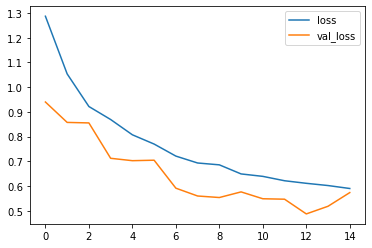

In [23]:

metrics[['loss','val_loss']].plot()
plt.show()

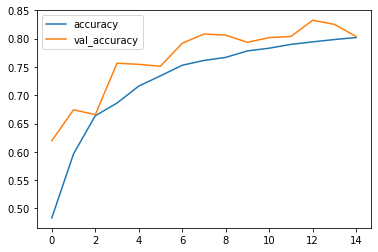

In [24]:

metrics[['accuracy','val_accuracy']].plot()
plt.show()

In [26]:
model.evaluate_generator(val_image_gen,verbose=0)

[0.5814985632896423, 0.7960000038146973]

## Checking Model

In [41]:
train_image_gen.class_indices   # True Value

{'buildings': 0,
 'forest': 1,
 'glacier': 2,
 'mountain': 3,
 'sea': 4,
 'street': 5}

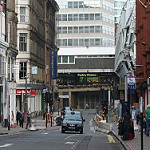

In [39]:
# 1
from tensorflow.keras.preprocessing import image
img = '../input/6-categories-images-classifications/seg_pred/seg_pred/10012.jpg'

my_image = image.load_img(img,target_size=image_shape)

my_image


In [40]:

my_image = image.img_to_array(my_image)

my_image = np.expand_dims(my_image, axis=0)

model.predict(my_image)

array([[0., 0., 0., 0., 0., 1.]], dtype=float32)

In [37]:
train_image_gen.class_indices   # True Value

{'buildings': 0,
 'forest': 1,
 'glacier': 2,
 'mountain': 3,
 'sea': 4,
 'street': 5}

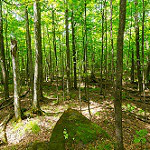

In [48]:
# 2

img = '../input/6-categories-images-classifications/seg_pred/seg_pred/10059.jpg'

my_image = image.load_img(img,target_size=image_shape)

my_image

In [49]:

my_image = image.img_to_array(my_image)

my_image = np.expand_dims(my_image, axis=0)

model.predict(my_image)

array([[0., 1., 0., 0., 0., 0.]], dtype=float32)

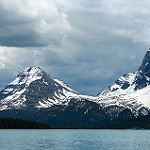

In [60]:
# 3

img = '../input/6-categories-images-classifications/seg_pred/seg_pred/10171.jpg'

my_image = image.load_img(img,target_size=image_shape)

my_image

In [61]:

my_image = image.img_to_array(my_image)

my_image = np.expand_dims(my_image, axis=0)

model.predict(my_image)

array([[0., 0., 1., 0., 0., 0.]], dtype=float32)

In [62]:
train_image_gen.class_indices   # True Value

{'buildings': 0,
 'forest': 1,
 'glacier': 2,
 'mountain': 3,
 'sea': 4,
 'street': 5}

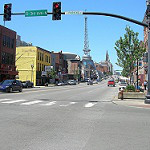

In [93]:
# 4

img = '../input/6-categories-images-classifications/seg_pred/seg_pred/10199.jpg'

my_image = image.load_img(img,target_size=image_shape)

my_image

In [94]:

my_image = image.img_to_array(my_image)

my_image = np.expand_dims(my_image, axis=0)

model.predict(my_image)

array([[0., 0., 0., 0., 0., 1.]], dtype=float32)

In [95]:
classes = ['buildings', 'forest', 'glacier', 'mountain', 'sea','street']

ans = model.predict(my_image)
res = ans[0]==max(ans[0])
j=0;
for i in res:
    if i:
        print(classes[j])
    j = j+1

street


In [76]:
model.save('image_classication_6.h5')

# Thankyou 